Бизнес цели:
1. Оптимизация ценовой стратегии: анализ факторов, влияющих на стоимость недвижимости, чтобы помочь продавцам устанавливать конкурентоспособные цены и увеличивать прибыль.
2. Улучшение инвестиционных решений: предоставление аналитики для инвесторов, чтобы они могли определить наиболее выгодные районы и типы недвижимости для вложений.

Цели технического проекта:
1. Создание модели машинного обучения для прогнозирования стоимости недвижимости на основе таких характеристик, как площадь дома, количество спален и ванных комнат, расположение, возраст дома, наличие бассейна и других факторов.
2. Разработка системы, которая анализирует волатильность цен (показатель изменчивости цены актива за определённый период времени) на недвижимость в разных районах, учитывая исторические данные о продажах, сезонные колебания и демографические изменения, чтобы выявить наиболее стабильные и перспективные зоны для инвестиций.

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv("data/kc_house_data.csv")
print(df)

# Преобразование даты продажи в числовой формат (кол-во дней с 01.01.1970)
df['date'] = pd.to_datetime(df['date'])
df['date_numeric'] = (df['date'] - pd.Timestamp('1970-01-01')).dt.days
print(df['date_numeric'])


               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop="first")

encoded_values = encoder.fit_transform(df[["bathrooms", "bedrooms"]])

encoded_columns = encoder.get_feature_names_out(["bathrooms", "bedrooms"])

encoded_values_df = pd.DataFrame(encoded_values, columns=encoded_columns)

encoded_values_df

bathrooms_0.5  bathrooms_0.75  bathrooms_1.0  bathrooms_1.25  \
0                0.0             0.0            1.0             0.0   
1                0.0             0.0            0.0             0.0   
2                0.0             0.0            1.0             0.0   
3                0.0             0.0            0.0             0.0   
4                0.0             0.0            0.0             0.0   
...              ...             ...            ...             ...   
21608            0.0             0.0            0.0             0.0   
21609            0.0             0.0            0.0             0.0   
21610            0.0             1.0            0.0             0.0   
21611            0.0             0.0            0.0             0.0   
21612            0.0             1.0            0.0             0.0   

       bathrooms_1.5  bathrooms_1.75  bathrooms_2.0  bathrooms_2.25  \
0                0.0             0.0            0.0             0.0   
1                0.0             0.0            0.0             1.0   
2                0.0             0.0            0.0             0.0   
3                0.0             0.0            0.0             0.0   
4                0.0             0.0            1.0             0.0   
...              ...             ...            ...             ...   
21608            0.0             0.0            0.0             0.0   
21609            0.0             0.0            0.0             0.0   
21610            0.0             0.0            0.0             0.0   
21611            0.0             0.0            0.0             0.0   
21612            0.0             0.0            0.0             0.0   

       bathrooms_2.5  bathrooms_2.75  ...  bedrooms_3  bedrooms_4  bedrooms_5  \
0                0.0             0.0  ...         1.0         0.0         0.0   
1                0.0             0.0  ...         1.0         0.0         0.0   
2                0.0             0.0  ...         0.0         0.0         0.0   
3                0.0             0.0  ...         0.0         1.0         0.0   
4                0.0             0.0  ...         1.0         0.0         0.0   
...              ...             ...  ...         ...         ...         ...   
21608            1.0             0.0  ...         1.0         0.0         0.0   
21609            1.0             0.0  ...         0.0         1.0         0.0   
21610            0.0             0.0  ...         0.0         0.0         0.0   
21611            1.0             0.0  ...         1.0         0.0         0.0   
21612            0.0             0.0  ...         0.0         0.0         0.0   

       bedrooms_6  bedrooms_7  bedrooms_8  bedrooms_9  bedrooms_10  \
0             0.0         0.0         0.0         0.0          0.0   
1             0.0         0.0         0.0         0.0          0.0   
2             0.0         0.0         0.0         0.0          0.0   
3             0.0         0.0         0.0         0.0          0.0   
4             0.0         0.0         0.0         0.0          0.0   
...           ...         ...         ...         ...          ...   
21608         0.0         0.0         0.0         0.0          0.0   
21609         0.0         0.0         0.0         0.0          0.0   
21610         0.0         0.0         0.0         0.0          0.0   
21611         0.0         0.0         0.0         0.0          0.0   
21612         0.0         0.0         0.0         0.0          0.0   

       bedrooms_11  bedrooms_33  
0              0.0          0.0  
1              0.0          0.0  
2              0.0          0.0  
3              0.0          0.0  
4              0.0          0.0  
...            ...          ...  
21608          0.0          0.0  
21609          0.0          0.0  
21610          0.0          0.0  
21611          0.0          0.0  
21612          0.0          0.0  

[21613 rows x 41 columns]

In [70]:
# Функция для разбиение на выборки
def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.2,
    frac_test=0.2,
    random_state=None,
):
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input
    y = df_input[[stratify_colname]]

    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

# Определение бинов для цены
bins = [
    df["price"].min(),
    df["price"].quantile(0.33),
    df["price"].quantile(0.66),
    df["price"].max(),
]
labels = ["Low", "Medium", "High"]
df["price_binned"] = pd.cut(df["price"], bins=bins, labels=labels)
df = df.dropna()

# Стратифицированное (для сохранения пропорций)
# разбиение на обучающую, валидационную и тестовую выборки
df_train, df_val, df_test = split_stratified_into_train_val_test(
    df, stratify_colname="price_binned", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print(df_train.columns)

print("Обучающая выборка: ", df_train.shape)
print(df_train["price"].value_counts())

print("Валидационная выборка: ", df_val.shape)
print(df_val["price"].value_counts())

print("Тестовая выборка: ", df_test.shape)
print(df_test["price"].value_counts())

print("Обучающая выборка по категориям: ", df_train["price_binned"].value_counts())
print("Валидационная выборка по категориям: ", df_val["price_binned"].value_counts())
print("Тестовая выборка по категориям: ", df_test["price_binned"].value_counts())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_numeric',
       'price_binned'],
      dtype='object')
Обучающая выборка:  (12967, 23)
price
550000.0    105
350000.0    104
450000.0     99
400000.0     96
325000.0     94
           ... 
887250.0      1
123000.0      1
638700.0      1
502500.0      1
793000.0      1
Name: count, Length: 2982, dtype: int64
Валидационная выборка:  (4322, 23)
price
350000.0    39
450000.0    37
425000.0    34
325000.0    33
575000.0    33
            ..
500007.0     1
129888.0     1
546800.0     1
378750.0     1
436500.0     1
Name: count, Length: 1526, dtype: int64
Тестовая выборка:  (4323, 23)
price
450000.0     36
375000.0     36
300000.0     34
500000.0     31
425000.0     30
             ..
196700.0      1
482975.0      1
2

In [71]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df_train, df_train["price_binned"])

# Создание датафрейма для результирующей выборки
df_train_rus = pd.DataFrame(X_resampled)

# Добавление целевой переменной в новый датафрейм
df_train_rus["price_binned"] = y_resampled

print("Обучающая выборка после undersampling: ", df_train_rus.shape)
print(df_train_rus["price_binned"].value_counts())

Обучающая выборка после undersampling:  (12765, 23)
price_binned
Low       4255
Medium    4255
High      4255
Name: count, dtype: int64


In [72]:
# Преобразование категориального столбца price_binned в дамми-переменные
# Добавляем новые столбцы (Low, Medium, High) и выставляем 1 или 0 в зависмоитси от цены
df_train = pd.get_dummies(df_train, columns=["price_binned"])

# Binning площади в 4 категории на основе квартилей
# Новый столбец с со значением 0, если оно подходит первому квартилю (категории значений) и тд
df_train["Area_binned"] = pd.qcut(df_train["sqft_living"], q=4, labels=False)

# Вывод обновленного датафрейма
print(df_train)

               id       date     price  bedrooms  bathrooms  sqft_living  \
921    4046500320 2015-01-20  342000.0         3       1.75         1660   
16637  6802200190 2015-01-21  222500.0         3       2.00         1450   
20955  8138870530 2014-05-05  419190.0         2       2.50         1590   
14806  4370700065 2015-05-04  907500.0         3       2.25         2850   
20000  2767601311 2014-10-24  445000.0         3       2.50         1260   
...           ...        ...       ...       ...        ...          ...   
2640   4045800030 2015-05-11  739000.0         3       2.25         2220   
16590  8635750950 2014-06-07  568500.0         4       2.50         2460   
20011  9396700028 2014-07-22  358000.0         2       2.50         1278   
9296    625049310 2015-03-11  587750.0         2       1.00          890   
15823  5088500170 2014-10-27  435000.0         3       2.50         2530   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
921       

In [73]:
from sklearn.preprocessing import StandardScaler

# Нормализация значений для указанных столбцов
# чтобы значения разных столбов в среднем были 0, а стандартное отклонение - 1
scaler = StandardScaler()
df_train[["price", "sqft_living", "sqft_lot", "floors", "waterfront"]] = (
    scaler.fit_transform(
        df_train[["price", "sqft_living", "sqft_lot", "floors", "waterfront"]]
    )
)

# Расчет волатильности (разница между площадью дома и площадью участка)
df_train["Volatility"] = (
    df_train["sqft_living"] - df_train["sqft_lot"]
)  

# Вывод обновленного датафрейма
print(df_train)

               id       date     price  bedrooms  bathrooms  sqft_living  \
921    4046500320 2015-01-20 -0.540558         3       1.75    -0.461829   
16637  6802200190 2015-01-21 -0.863431         3       2.00    -0.693145   
20955  8138870530 2014-05-05 -0.332001         2       2.50    -0.538934   
14806  4370700065 2015-05-04  0.987347         3       2.25     0.848963   
20000  2767601311 2014-10-24 -0.262266         3       2.50    -0.902431   
...           ...        ...       ...       ...        ...          ...   
2640   4045800030 2015-05-11  0.532083         3       2.25     0.155014   
16590  8635750950 2014-06-07  0.071415         4       2.50     0.419376   
20011  9396700028 2014-07-22 -0.497328         2       2.50    -0.882604   
9296    625049310 2015-03-11  0.123426         2       1.00    -1.309988   
15823  5088500170 2014-10-27 -0.289284         3       2.50     0.496481   

       sqft_lot    floors  waterfront  view  ...      lat     long  \
921    0.051429  

In [74]:
import featuretools as ft

# Убеждаемся, что столбец 'date' в формате datetime
df["date"] = pd.to_datetime(df["date"])

# Установка индекса на столбец 'id' (предполагается, что 'id' уникален)
df.set_index("id", inplace=True)

# Создание EntitySet для объединения разных датасетов для удобного использования
es = ft.EntitySet(id="house_sales")
es = es.add_dataframe(
    dataframe_name="house_data",
    dataframe=df,
    index="id",  # уникальный идентификатор
)

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="house_data")

# Показать определение признаков
print(feature_defs)

c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\TEMP_UNIVERSITY\mai\.venv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


[<Feature: price>, <Feature: bedrooms>, <Feature: bathrooms>, <Feature: sqft_living>, <Feature: sqft_lot>, <Feature: floors>, <Feature: waterfront>, <Feature: view>, <Feature: condition>, <Feature: grade>, <Feature: sqft_above>, <Feature: sqft_basement>, <Feature: yr_built>, <Feature: yr_renovated>, <Feature: zipcode>, <Feature: lat>, <Feature: long>, <Feature: sqft_living15>, <Feature: sqft_lot15>, <Feature: date_numeric>, <Feature: price_binned>, <Feature: DAY(date)>, <Feature: MONTH(date)>, <Feature: WEEKDAY(date)>, <Feature: YEAR(date)>]


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Копирование датафрейма для регрессионного анализа
df_train_regression = df_train.copy()

# Определение признаков и целевой переменной
X_train = df_train_regression.drop(
    ["price", "date"], axis=1
)
y_train = df_train_regression["price"]  # Целевая переменная
X_test = df_test.drop(
    ["price", "date"], axis=1
)
y_test = df_test["price"]  # Целевая переменная

# Преобразование категориальных признаков в дамми-переменные
# (создание столбцов значений со значениями 0 или 1, если это булевой столбец)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Устранение различий в количестве столбцов между обучающей и тестовой выборками
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Проверка типов данных
print(X_train_encoded.dtypes)

# Обучение модели линейной регрессии (поиск зависимостей между признаками)
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Предсказание цены на тестовой выборке
y_pred = model.predict(X_test_encoded)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # Корень из MSE для RMSE

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

id                       int64
bedrooms                 int64
bathrooms              float64
sqft_living            float64
sqft_lot               float64
floors                 float64
waterfront             float64
view                     int64
condition                int64
grade                    int64
sqft_above               int64
sqft_basement            int64
yr_built                 int64
yr_renovated             int64
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
date_numeric             int64
price_binned_Low          bool
price_binned_Medium       bool
price_binned_High         bool
Area_binned              int64
Volatility             float64
dtype: object
MAE: 539145.7717358439
MSE: 430064692545.0895
RMSE: 655793.1781782191


In [76]:
# Оценка скорости вычисления
import time

start_time = time.time()
model.fit(X_train_encoded, y_train)
training_time = time.time() - start_time

start_time = time.time()
predictions = model.predict(X_test_encoded)
prediction_time = time.time() - start_time

print(
    f"Время, затраченное на обучение модели: {training_time}.\nВремя, затраченное на предсказание: {prediction_time}"
)

Время, затраченное на обучение модели: 0.08102583885192871.
Время, затраченное на предсказание: 0.003012418746948242


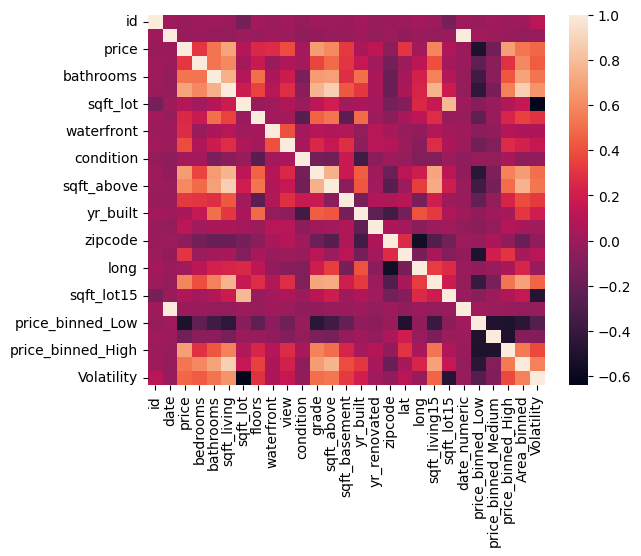

In [77]:
# Оценка корреляции
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_train_regression.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()